In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('year.csv')

In [3]:
Data.dtypes

Unnamed: 0    int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
2020          int64
dtype: object

In [4]:
Data=Data.drop(['Unnamed: 0'],1)

In [5]:
Data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,71,72,73,74,75,76,77,78,61,62
1,71,72,73,74,75,76,77,78,79,61
2,71,72,73,74,75,76,77,78,79,710
3,71,72,73,74,75,76,77,78,79,710
4,71,72,73,74,75,76,77,78,79,710
...,...,...,...,...,...,...,...,...,...,...
9635,61,62,63,64,51,52,53,54,55,56
9636,61,62,63,64,65,66,67,68,69,610
9637,71,72,73,74,75,76,77,78,79,61
9638,91,92,93,94,95,96,51,52,53,54


In [6]:
Data.dtypes

2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
Data.columns

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [10]:
features=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [11]:
X = Data[features]
y = Data['2020']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [14]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
predictions=model1.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9446749654218534

In [17]:
predict_2020=model1.predict(X)
print('Accuracy Score:',accuracy_score(y,predict_2020))
print('R2_score:',metrics.r2_score(y,predict_2020))

Accuracy Score: 0.9466804979253112
R2_score: 0.7971599253429976


In [18]:
model1.tree_.node_count

237

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
accuracy_rate = []
for i in range(1,100,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc = accuracy_score(y_test, pred_i)
    accuracy_rate.append(acc)

<IPython.core.display.Javascript object>


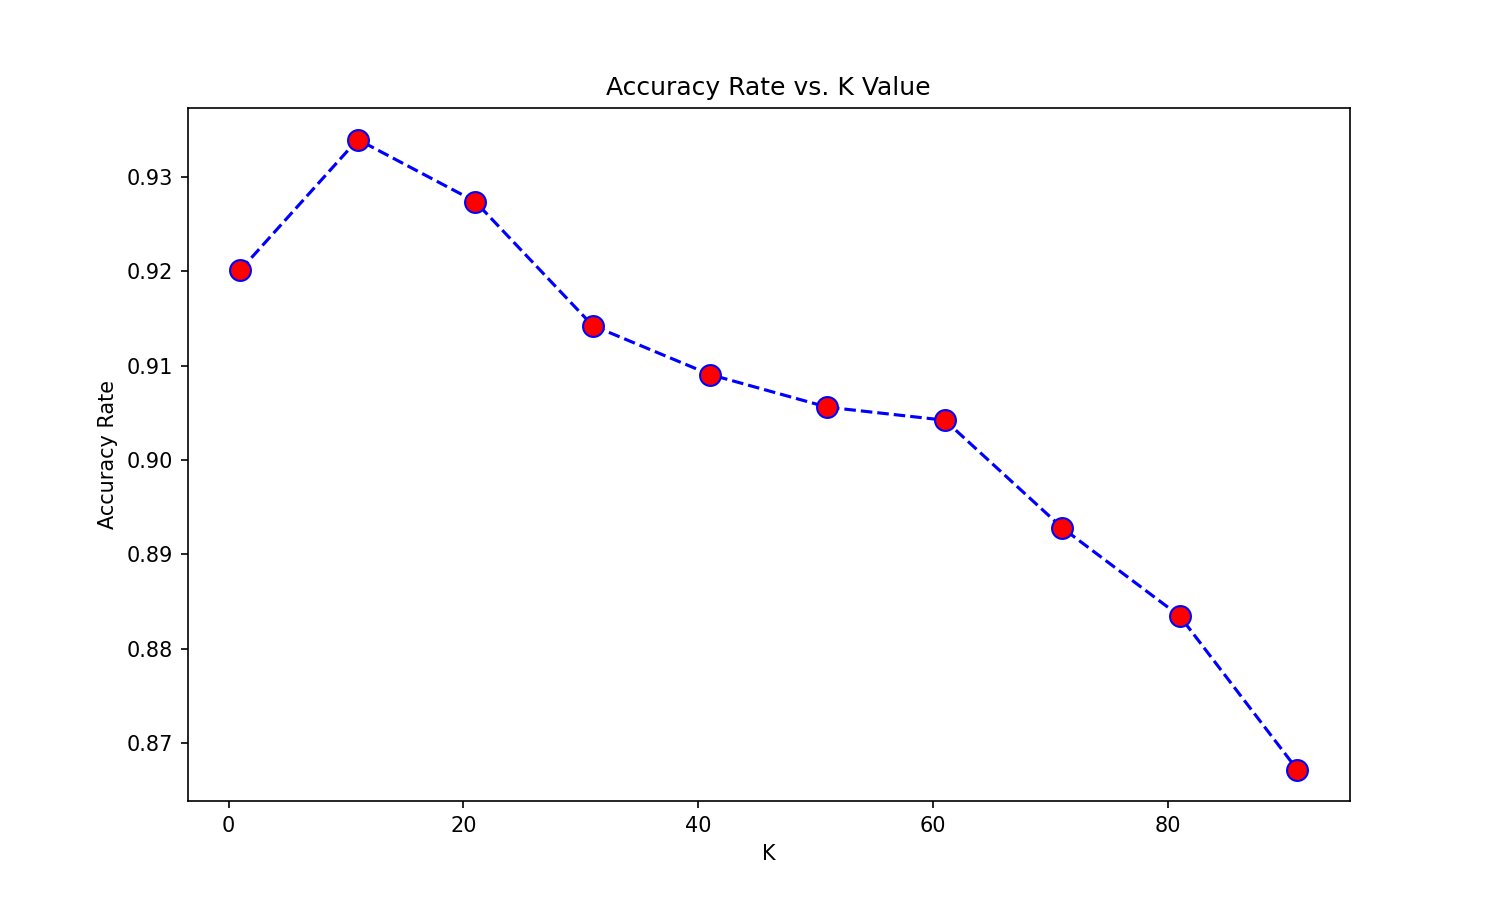

Text(0, 0.5, 'Accuracy Rate')

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100,10),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.9349930843706777

In [23]:
predict_2020=knn.predict(X)
print('Accuracy:',accuracy_score(y,predict_2020))
print('R2_score:',metrics.r2_score(y,predict_2020))

Accuracy: 0.9358921161825726
R2_score: 0.7913261827898211


In [44]:
Predict=Data.iloc[:,0:9]

In [45]:
Predict

,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,71,72,73,74,75,76,77,78,61
1,71,72,73,74,75,76,77,78,79
2,71,72,73,74,75,76,77,78,79
3,71,72,73,74,75,76,77,78,79
4,71,72,73,74,75,76,77,78,79
...,...,...,...,...,...,...,...,...,...
9635,61,62,63,64,51,52,53,54,55
9636,61,62,63,64,65,66,67,68,69
9637,71,72,73,74,75,76,77,78,79
9638,91,92,93,94,95,96,51,52,53


In [47]:
Predict[2020]=model1.predict(Predict)

In [50]:
Predict[2021]=model1.predict(Predict.iloc[:,1:10])

C:\Users\vnara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vnara\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
for i in range(1,15):
    Predict[2021+i]=model1.predict(Predict.iloc[:,1+i:10+i])

C:\Users\vnara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vnara\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vnara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vnara\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vnara\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all 

In [55]:
Predict

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,71,72,73,74,75,76,77,78,61,62,...,68,69,610,710,710,710,710,810,810,810
1,71,72,73,74,75,76,77,78,79,710,...,810,810,810,810,810,810,810,810,810,810
2,71,72,73,74,75,76,77,78,79,710,...,810,810,810,810,810,810,810,810,810,810
3,71,72,73,74,75,76,77,78,79,710,...,810,810,810,810,810,810,810,810,810,810
4,71,72,73,74,75,76,77,78,79,710,...,810,810,810,810,810,810,810,810,810,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,61,62,63,64,51,52,53,54,55,56,...,710,710,710,810,810,810,810,810,810,810
9636,61,62,63,64,65,66,67,68,69,610,...,810,810,810,810,810,810,810,810,810,810
9637,71,72,73,74,75,76,77,78,79,710,...,810,810,810,810,810,810,810,810,810,810
9638,91,92,93,94,95,96,51,52,53,54,...,510,710,710,710,710,810,810,810,810,810
